### Référence

Pour une base de référence naïve, nous pourrions deviner la même valeur pour tous les exemples de l'ensemble de test. On nous demande de prédire la probabilité de ne pas rembourser le prêt, donc si nous sommes totalement incertains, nous devinerions 0,5 pour toutes les observations de l'ensemble de test. Cela nous donnera une zone caractéristique de fonctionnement du récepteur sous la courbe (AUC ROC) de 0,5 dans la compétition (une devinette aléatoire sur une tâche de classification obtiendra un score de 0,5).

Puisque nous savons déjà quel score nous allons obtenir, nous n’avons pas vraiment besoin de faire une estimation naïve de base. Utilisons un modèle légèrement plus sophistiqué pour notre référence actuelle : la régression logistique.



https://colab.research.google.com/github/benji1437/OpenclassRoom/blob/main/Notebook_modelisation.ipynb

In [29]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('data.csv')
data = data.drop(['Unnamed: 0'], axis=1)
print('Les dimensions du data training : ', data.shape)
data.head()

Les dimensions du data training :  (307511, 240)


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_test = pd.read_csv('data_test.csv')
data_test = data_test.drop(['Unnamed: 0'], axis=1)
print('Les dimensions du data training : ', data_test.shape)
data_test.head()

Les dimensions du data training :  (48744, 239)


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,0,1,0,0,1,0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,0


## <a name="C4">MODELISATION </a>

In [4]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = data['TARGET']
y.shape

(307511,)

In [6]:
X = data.drop('TARGET', axis = 1)

In [7]:
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X.shape

(307511, 239)

In [8]:
data_test = data_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
data_test.shape

(48744, 239)

## Utilisation de l'algorithme SMOTE

In [9]:
X_train = X
y_train = y
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X_train, y_train)
data_sm = pd.concat([X_smote, y_smote], axis=1)

In [10]:
data_sm.shape

(565372, 240)

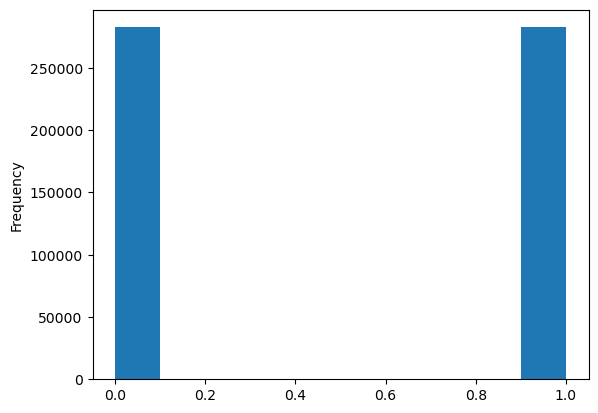

In [11]:
data_sm['TARGET'].plot.hist();

In [12]:
#plt.pie(data_sm, labels=data_sm['TARGET'], autopct='%.0f%%');

In [13]:
jeu0 = data_sm.sample(frac=0.3)
jeu0

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
561349,348135,0,0,1,0,112500.00000,235875.496042,12926.766437,198238.032622,0.031164,...,0,0,0,0,0,0,0,0,0,1
485310,449512,0,1,1,1,202500.00000,521280.000000,28054.382896,450000.000000,0.024906,...,0,0,0,0,0,0,0,0,0,1
130889,251816,0,1,1,0,135000.00000,675000.000000,34465.500000,675000.000000,0.046220,...,0,0,0,0,1,0,0,1,0,0
12996,115149,0,1,1,1,270000.00000,592560.000000,31153.500000,450000.000000,0.006629,...,0,0,0,0,1,0,0,1,0,0
178473,306811,0,0,1,1,90000.00000,531706.500000,28192.500000,459000.000000,0.035792,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502038,166101,0,0,1,0,90000.00000,274100.555445,13366.666634,225000.000000,0.016676,...,0,0,0,0,0,0,0,0,0,1
542751,326176,0,0,1,0,112500.00000,314071.634925,16315.377818,233509.522473,0.016765,...,0,0,0,0,0,0,0,0,0,1
145879,269144,0,1,1,1,405000.00000,385375.500000,41634.000000,346500.000000,0.007020,...,0,0,0,0,1,0,0,1,0,1
453195,172387,0,0,1,0,73226.34469,314100.000000,16573.500000,225000.000000,0.025015,...,0,0,0,0,0,0,0,0,0,1


In [14]:
jeu0.to_csv('jeu0.csv')

##  <a name="C2"> Baseline avec Dummy regressor</a>
 
 <a href="#C1">Haut</a>

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyRegressor

In [16]:
X = jeu0.drop('TARGET', axis = 1)
y = jeu0['TARGET']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_dum_median = DummyRegressor(strategy = 'median').fit(X_train, y_train)
y_pred = model_dum_median.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
model_dum_median.score(X_train, y_train)

-0.9955732039120531

In [19]:
X_train.shape

(135689, 239)

 ### Forêt aléatoire

In [18]:
from sklearn.ensemble import RandomForestClassifier
X = jeu0.drop('TARGET', axis = 1)
y = jeu0['TARGET']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [21]:
# S'entraîner sur les données d'entraînement
random_forest.fit(X_train, y_train)

random_forest.predict(X_test)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   36.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.7s finished


array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [25]:
# Faire des prédictions sur les données de test
predictions = random_forest.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.5s finished


In [28]:
# Créer un dataframe de soumission
data_RanForest = X_test[['SK_ID_CURR']]
data_RanForest['TARGET'] = predictions

# Save the submission dataframe
data_RanForest.to_csv('Essai/RanForest_baseline.csv', index = False)

C:\Users\dell\AppData\Local\Temp\ipykernel_7268\94792498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_RanForest['TARGET'] = predictions


###  Support  Vecteurs Machines

In [20]:
from sklearn.svm import SVC

In [21]:
X = jeu0.drop('TARGET', axis = 1)
y = jeu0['TARGET']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = StandardScaler()
model.fit(X_train)
X_train_std = model.transform(X_train)
X_test_std = model.transform(X_test)

In [ ]:

svc = SVC(C=1.0, random_state=1, kernel='linear')
svc.fit(X_train_std, y_train)


In [ ]:
y_pred = svc.predict(X_test_std)

In [ ]:
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

### XGBoots Classifier

In [30]:
from xgboost import XGBClassifier
import sklearn.metrics as metrics

In [31]:
X = jeu0.drop('TARGET', axis = 1)
y = jeu0['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [32]:
# create model instance
model = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

In [33]:
#modèle adapté
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
# make predictions
pred = model.predict(X_test)

In [35]:
y_test.shape

(33923,)

In [36]:
model.score(X_test, y_test)

0.7770539162220322

In [37]:
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, pred))

Accuracy score 0.777


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16751,     0],
       [17172,     0]], dtype=int64)